In [3]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [7]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
roc_curve = RocCurveDisplay.from_estimator

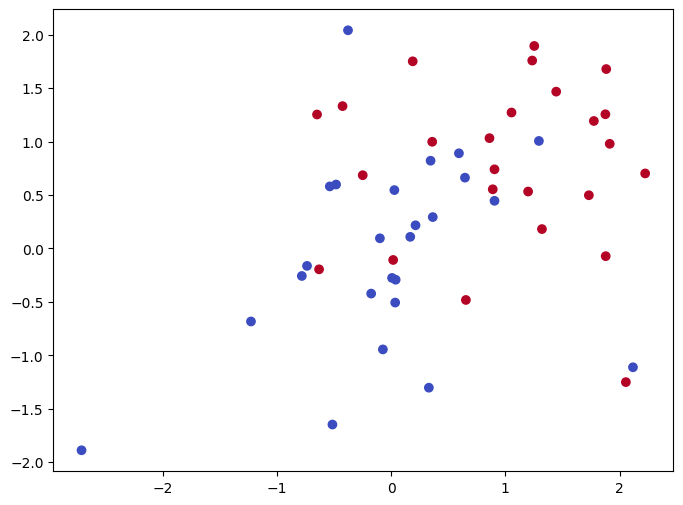

In [22]:
#Se generan las observaciones
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25+[1]*25)
X[y==1]+=1
fig, ax = subplots(figsize=(8,6))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm.coolwarm )

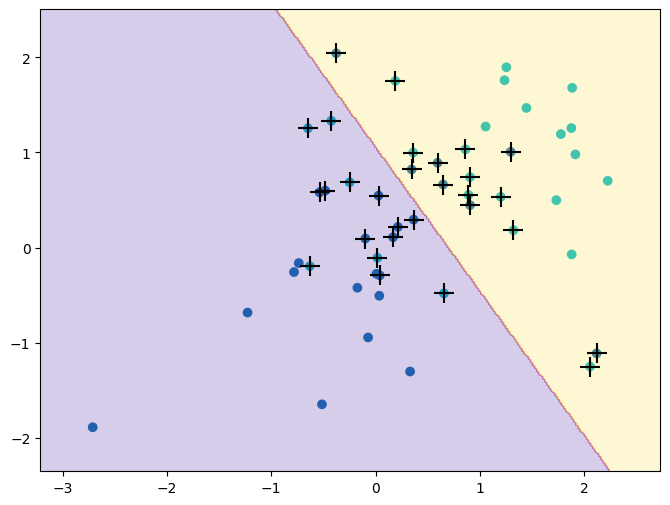

In [26]:
svm_linear = SVC(C=10, kernel="linear")
svm_linear.fit(X,y)

fig, ax = subplots(figsize=(8,6))
plot_svm(X, y, svm_linear, ax =  ax)

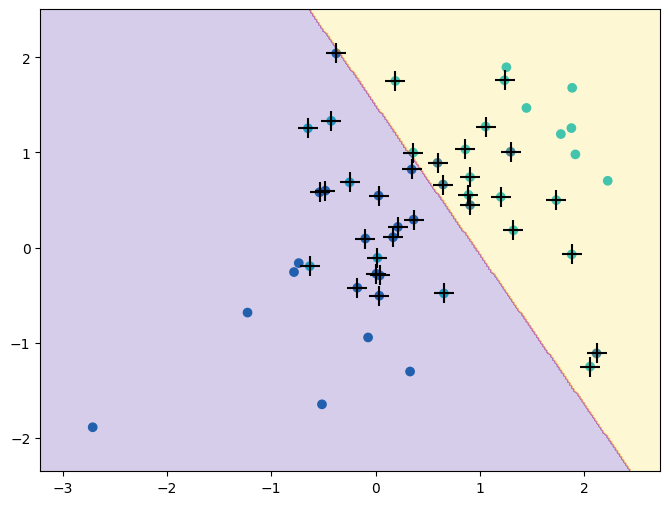

In [27]:
svm_linear = SVC(C=0.1, kernel="linear")
svm_linear.fit(X,y)

fig, ax = subplots(figsize=(8,6))
plot_svm(X, y, svm_linear, ax =  ax)

In [95]:
#Realizamos una selección de hiperparámetros
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_linear = SVC(kernel="linear")
parametros1 = {"C": [0.001, 0.01, 0.1, 0.2, 0.4,0.6, 0.8, 1,1.4, 1.8, 5, 10]}
grid1 = GridSearchCV(svm_linear, parametros1, scoring="accuracy")
grid1.fit(X,y)

svm_poly = SVC(kernel="poly")
parametros2 = {"C": [0.001, 0.01, 0.1, 0.2, 0.4,0.6, 0.8, 1,1.4, 1.8, 5, 10],
               "degree": [2,3,4,5]}
grid2 = GridSearchCV(svm_poly,parametros2, scoring="accuracy" )
grid2.fit(X,y)

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.4,
                               1.8, 5, 10],
                         'degree': [2, 3, 4, 5]},
             scoring='accuracy')

In [96]:
print(f'El menjor valor del hiperparámetro en el modelo lineal\
    C es {grid1.best_params_}, obteniendo así {grid1.best_score_}')
print(f'El menjor valor del hiperparámetro en el modelo polinomial\
    C es {grid2.best_params_}, obteniendo así {grid2.best_score_}')

mejor_svm_lineal = grid1.best_estimator_ 
mejor_svm_poly = grid2.best_estimator_

El menjor valor del hiperparámetro en el modelo lineal    C es {'C': 0.2}, obteniendo así 0.74
El menjor valor del hiperparámetro en el modelo polinomial    C es {'C': 0.01, 'degree': 3}, obteniendo así 0.72


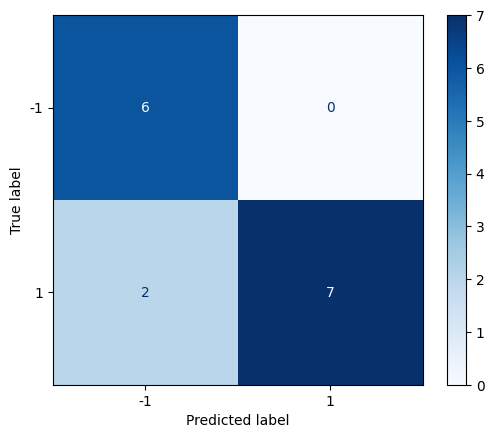

In [111]:
#Ahora analizamos ambos modelos en los datos de prueba
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predicciones1 = mejor_svm_lineal.predict(X_test)
predicciones2 = mejor_svm_poly.predict(X_test)

ConfusionMatrixDisplay.from_estimator(mejor_svm_lineal, X_test, y_test,cmap=plt.cm.Blues)



### NUEVO DATASET

In [64]:
import pandas as pd 
import numpy as np
df = pd.read_excel("default of credit card clients.xls", header = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [65]:
df.drop(columns="ID", axis = 0, inplace=True)

El dataset, originalmente contiene las siguientes columnas:
1. LIMIT_BALL: La cantidad de credito disponible
2. SEX: Masculino (1) o femenino(2)
3. EDUCATION: Escuela de graduados (1), Universidad (2), Preparatoria (3), Otros(4)
4. MARRIGE: Casado (1), Soltero (2), otro (3)
5. EDAD: Edad de la persona
6. PAY_: Pagando a tiempo (-1), no ha pagado en un mes(1), no ha pagado en 2 meses (2), ..., no ha pagado en nueve meces (9)
7. BILL_AMT: Los últimos prestamos (entero)
8. DEFAULT: No debe dinero (0), debe dinero (1) 

In [66]:
df.rename( {"default payment next month": "default"},axis="columns", inplace=True)
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

Tratando con datos faltantes o erroneos:

In [62]:
columnas = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
for columna in columnas:
    print(f'columna {columna}:  {np.sort(df[columna].unique())} ') 
    
EDUCATION_VALIDOS=[1,2,3,4]
MARRIAGE_VALIDOS=[1,2,3]



columna SEX:  [1 2] 
columna EDUCATION:  [0 1 2 3 4 5 6] 
columna MARRIAGE:  [0 1 2 3] 
columna AGE:  [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 79] 


Recordemos que en nuestro dataset podemos tener:
1. MCAR (Missing, Completly and Random):
2. MAR (Missing and Random):
3. NMAR (No Missing and Random):
4. SM (Structure Missing):

Veamos como son los datos erroneos

In [233]:
s = df.loc[1]
g = df.loc[2]

In [236]:
h = pd.DataFrame(columns = [0,1])

AttributeError: 'Series' object has no attribute 'DataFrame'